In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# To suppress Warnings
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [3]:
df = pd.read_csv('day.csv', low_memory=False)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

### Validate Dataset

In [6]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All are Non-Null columns.
We need to convert 'dteday' from 'object' to 'datetime'.

### Converting Data

In [10]:
# Converting Date into Pandas DateTime format
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Updating 'season' column
df['season'] = df['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Updating 'yr' column
df['yr'] = df['dteday'].dt.year
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Updating 'month' column
df['mnth'] = df['dteday'].dt.month_name()
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Updating 'weekday' column
df['weekday'] = df['dteday'].dt.day_name()
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,January,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,January,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Weather Dictionary**
<br>
1 = `Clear`<br>
2 = `Mist Cloudy`<br>
3 = `Light Rain`<br>
4 = `Heavy Rain`

In [16]:
# Updating 'weathersit' column
df['weathersit'] = df['weathersit'].map({1 : 'Clear', 2 : 'Mist Cloudy', 3 : 'Light Rain', 4 : 'Heavy Rain'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,January,0,Monday,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,January,0,Tuesday,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping unnecessary columns

In [18]:
df.drop(labels=['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Monday,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,Tuesday,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Checking data again

In [20]:
# Checking 'workingday' column
df[(df['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['holiday'] == 0) & (df['workingday']==0)]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Monday,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,Tuesday,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801
7,spring,2018,January,0,Monday,0,Mist Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,2018,January,0,Tuesday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
14,spring,2018,January,0,Monday,0,Mist Cloudy,9.566653,12.40560,49.8750,10.583521,1248
...,...,...,...,...,...,...,...,...,...,...,...,...
700,winter,2019,December,0,Monday,0,Mist Cloudy,14.247500,17.96040,82.3333,8.333393,4649
707,winter,2019,December,0,Monday,0,Mist Cloudy,15.750847,19.50730,90.5417,10.584325,3228
714,winter,2019,December,0,Monday,0,Mist Cloudy,14.862500,18.49690,83.8750,6.749714,3786
721,spring,2019,December,0,Monday,0,Clear,10.079153,12.97355,51.5417,8.916561,1787


It looks like workingday columns has some data quality issue.<br>Since we can see there is No Holiday, No Weekend but `workingday is showing as zero`.<br>So dropping 'workingday' column and creating new column as 'is_weekend'

In [22]:
df.drop(labels='workingday', axis=1, inplace=True)

In [23]:
df['is_weekend'] = df['weekday'].apply(lambda x : 1  if(x == 'Sunday' or x == 'Saturday') else  0)
df.head(10)

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,is_weekend
0,spring,2018,January,0,Monday,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,2018,January,0,Tuesday,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801,0
2,spring,2018,January,0,Wednesday,Clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,2018,January,0,Thursday,Clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,2018,January,0,Friday,Clear,9.305237,11.46350,43.6957,12.522300,1600,0
5,spring,2018,January,0,Saturday,Clear,8.378268,11.66045,51.8261,6.000868,1606,1
6,spring,2018,January,0,Sunday,Mist Cloudy,8.057402,10.44195,49.8696,11.304642,1510,1
7,spring,2018,January,0,Monday,Mist Cloudy,6.765000,8.11270,53.5833,17.875868,959,0
8,spring,2018,January,0,Tuesday,Clear,5.671653,5.80875,43.4167,24.250650,822,0
9,spring,2018,January,0,Wednesday,Clear,6.184153,7.54440,48.2917,14.958889,1321,0


## EDA

### Univariate Analysis

#### Analyzing 'weathersit' column

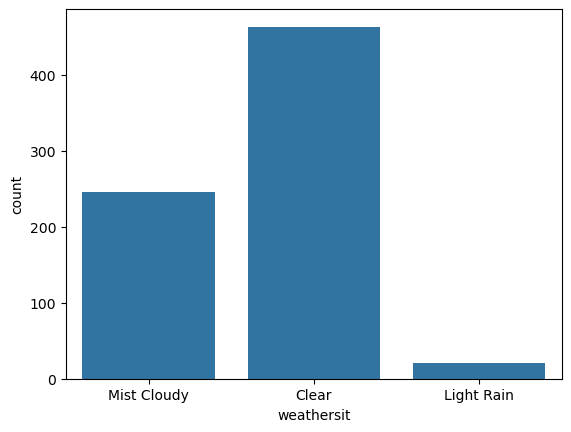

In [27]:
sns.countplot(data=df, x='weathersit')
plt.show()

Mostly weather was `Clear` or `Mist Cloudy`

#### Analyzing 'temp' column

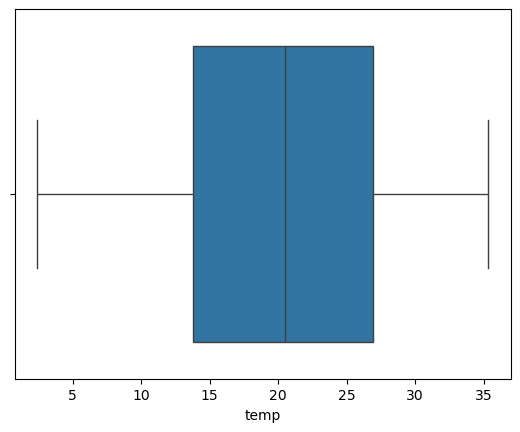

In [30]:
sns.boxplot(data=df, x='temp')
plt.show()

There are no outliers in 'temp' column

#### Analyzing 'atemp' column

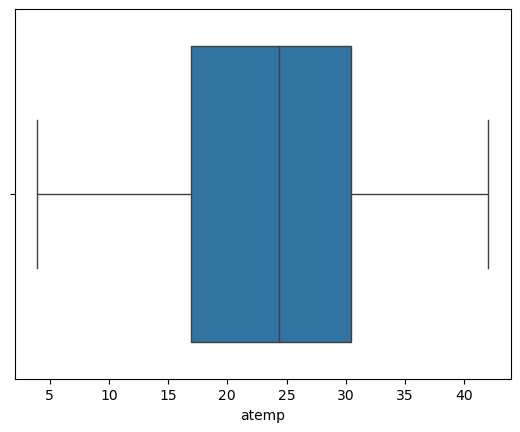

In [33]:
sns.boxplot(data=df, x='atemp')
plt.show()

#### Analyzing 'hum' column

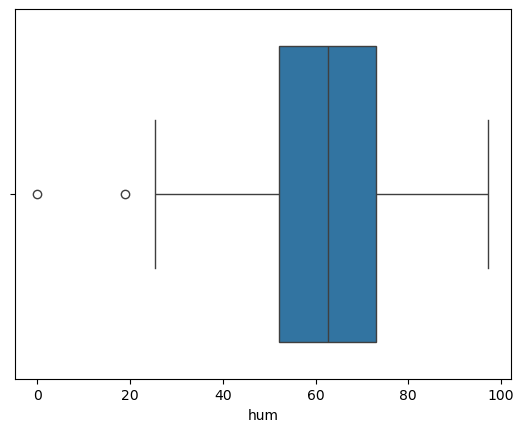

In [35]:
sns.boxplot(data=df, x='hum')
plt.show()

#### Analyzing 'windspeed' column

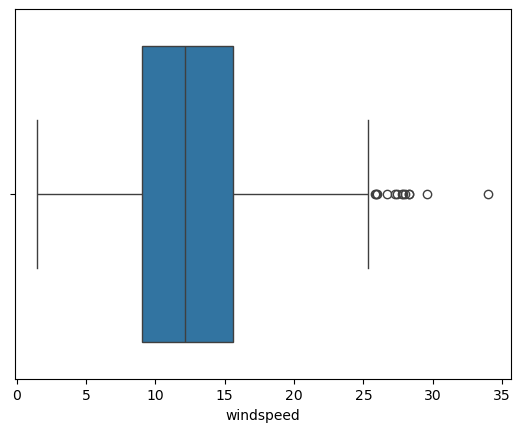

In [37]:
sns.boxplot(data=df, x='windspeed')
plt.show()

### Bi-Variate Analysis

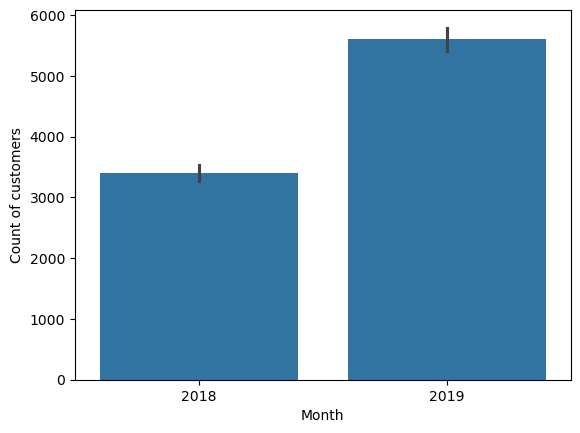

In [39]:
# Barplot of Year vs Count of customers
sns.barplot(data=df,x='yr',y='cnt')
plt.xlabel('Month')
plt.ylabel('Count of customers')
plt.show()

<font color = red><b>Observation - </b></font> Number of customers got increased in year 2019 than that of 2018

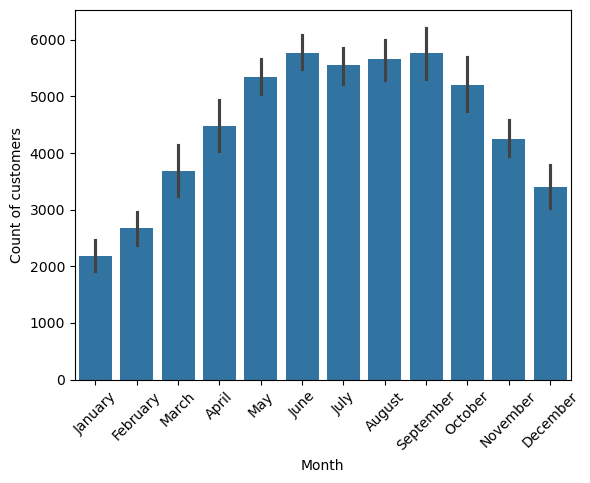

In [41]:
# Barplot of Month vs Count of customers
sns.barplot(data=df,x='mnth',y='cnt')
plt.xlabel('Month')
plt.ylabel('Count of customers')
plt.xticks(rotation=45)
plt.show()

<font color = red><b>Observation - </b></font>Demand starts increasing at start of year; It peaks in mid-year and starts dropping until end of year

In [43]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,is_weekend
0,spring,2018,January,0,Monday,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,2018,January,0,Tuesday,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801,0
2,spring,2018,January,0,Wednesday,Clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,2018,January,0,Thursday,Clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,2018,January,0,Friday,Clear,9.305237,11.46350,43.6957,12.522300,1600,0


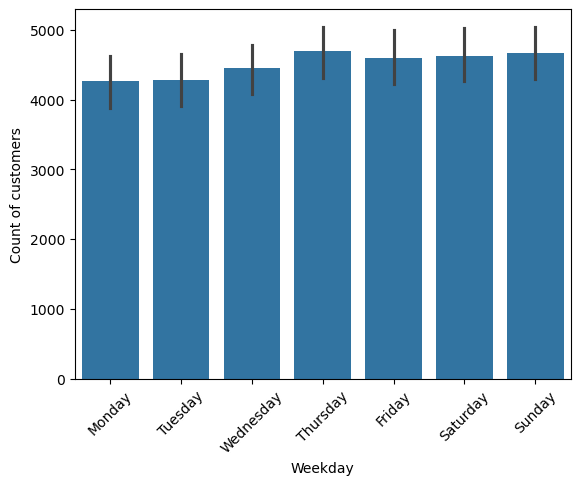

In [44]:
# Barplot of Weekday vs Count of customers
sns.barplot(data=df,x='weekday',y='cnt')
plt.xlabel('Weekday')
plt.ylabel('Count of customers')
plt.xticks(rotation=45)
plt.show()

<font color = red><b>Observation - </b></font>Nuber of customers are not affected by weekday

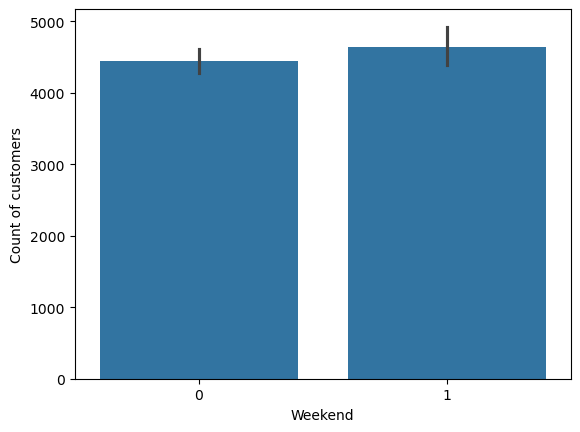

In [46]:
# Barplot of Weekend vs Count of customers
sns.barplot(data=df,x='is_weekend',y='cnt')
plt.xlabel('Weekend')
plt.ylabel('Count of customers')
plt.show()

<font color = red><b>Observation - </b></font>Nuber of customers are not affected by weekend

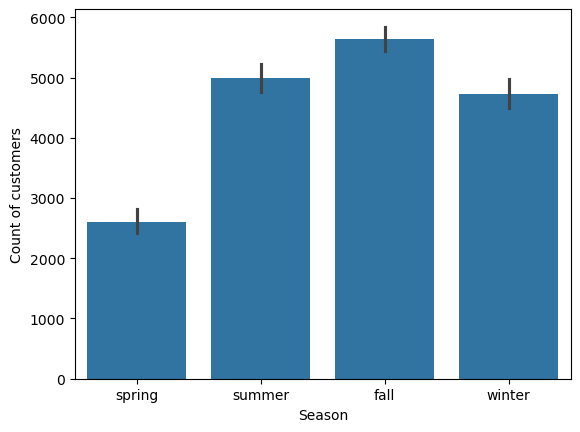

In [48]:
# Barplot of Season vs Count of customers
sns.barplot(data=df,x='season',y='cnt')
plt.xlabel('Season')
plt.ylabel('Count of customers')
plt.show()

<font color = red><b>Observation - </b></font>There is Low number of customers in `Spring` season

In [50]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,is_weekend
0,spring,2018,January,0,Monday,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,2018,January,0,Tuesday,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801,0
2,spring,2018,January,0,Wednesday,Clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,2018,January,0,Thursday,Clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,2018,January,0,Friday,Clear,9.305237,11.46350,43.6957,12.522300,1600,0


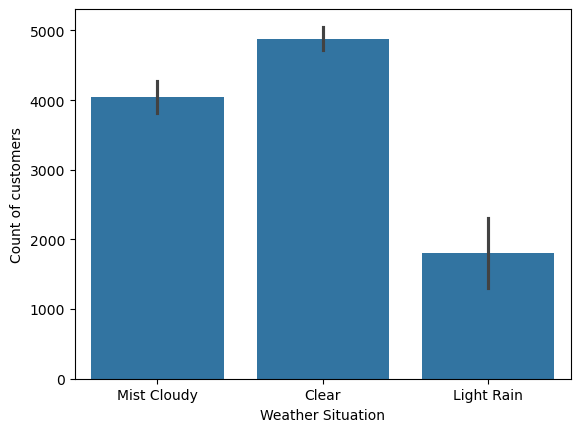

In [51]:
# Barplot of Weather Situation vs Count of customers
sns.barplot(data=df,x='weathersit',y='cnt')
plt.xlabel('Weather Situation')
plt.ylabel('Count of customers')
plt.show()

Since weather was mostly 'Mist Cloudy' or 'Clear';<br> more Number of Customers appeared in that weather

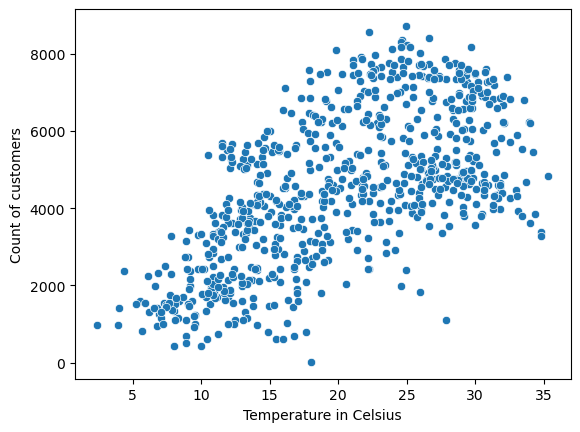

In [53]:
# Scatterplot of Temperature vs Count of customers
sns.scatterplot(data=df, x='temp', y='cnt')
plt.xlabel('Temperature in Celsius')
plt.ylabel('Count of customers')
plt.show()

<font color = red><b>Observation - </b></font>Temperature and Count of customers is having Positive Linear relationship

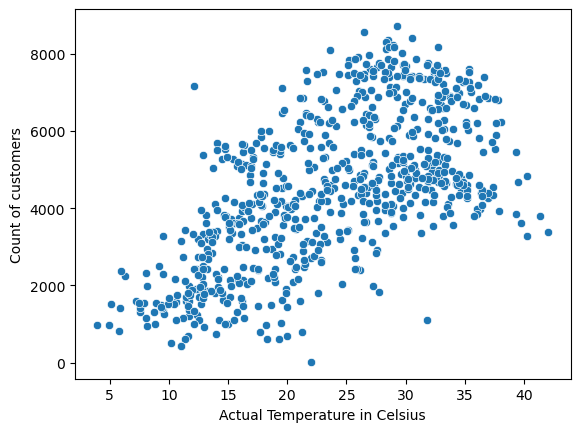

In [55]:
# Scatterplot of Actual Temperature vs Count of customers
sns.scatterplot(data=df, x='atemp', y='cnt')
plt.xlabel('Actual Temperature in Celsius')
plt.ylabel('Count of customers')
plt.show()

<font color = red><b>Observation - </b></font>Actual Temperature and Count of customers is having Positive Linear relationship

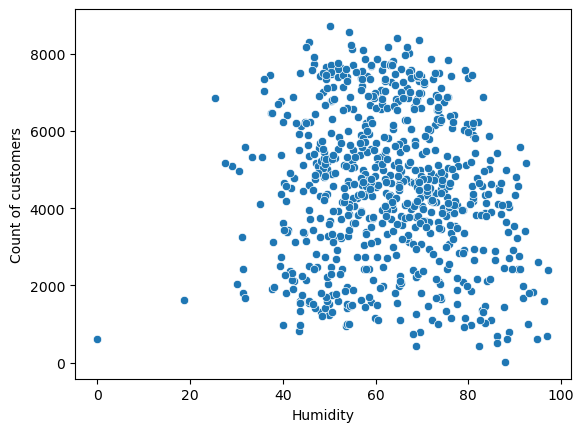

In [57]:
# Scatterplot of Humidity vs Count of customers
sns.scatterplot(data=df, x='hum', y='cnt')
plt.xlabel('Humidity')
plt.ylabel('Count of customers')
plt.show()

<font color = red><b>Observation - </b></font>There is NO Linear Relationship between Humidity and Count of customers

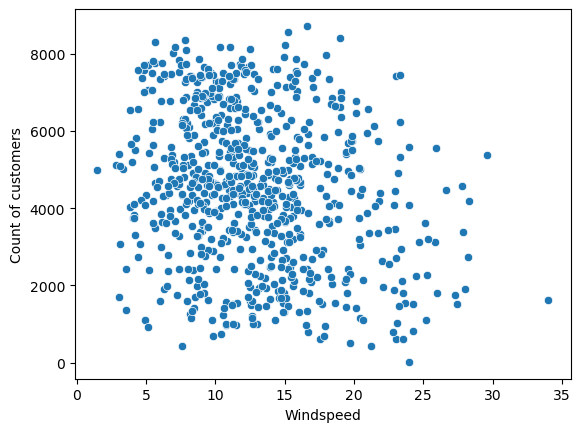

In [59]:
# Scatterplot of Windspeed vs Count of customers
sns.scatterplot(data=df, x='windspeed', y='cnt')
plt.xlabel('Windspeed')
plt.ylabel('Count of customers')
plt.show()

<font color = red><b>Observation - </b></font>There is NO Linear Relationship between Windspeed and Count of customers

## Multivariate Analysis

#### Plotting Month vs Count of Customers for Year 2018 and 2019

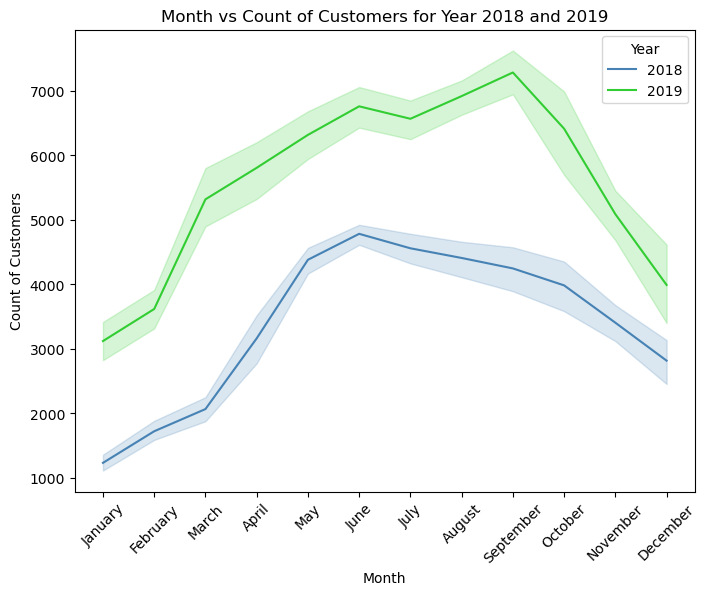

In [63]:
plt.figure(figsize=(8, 6))
custom_palette = sns.color_palette(["#4682B4", "#32CD32"])
sns.lineplot(data=df, x='mnth', y='cnt', hue='yr', palette=custom_palette)
plt.xlabel('Month')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.title('Month vs Count of Customers for Year 2018 and 2019')
plt.show()

<font color = red><b>Observation - </b></font>For both years demand starts increasing at start of year. It peaks in mid-year and starts dropping until end of year

#### Plotting Weekday vs Count of Customers for Year 2018 and 2019

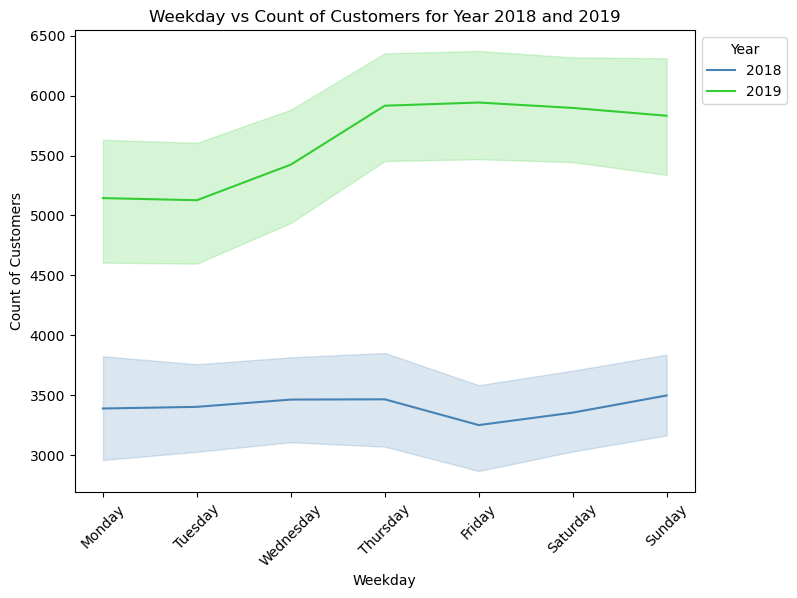

In [66]:
plt.figure(figsize=(8, 6))
custom_palette = sns.color_palette(["#4682B4", "#32CD32"])
sns.lineplot(data=df, x='weekday', y='cnt', hue='yr', palette=custom_palette)
plt.xlabel('Weekday')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Weekday vs Count of Customers for Year 2018 and 2019')
plt.show()

<font color = red><b>Observation - </b></font>For Year 2019, there is sightly increase in demand from Thursday to Sunday

In [68]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,is_weekend
0,spring,2018,January,0,Monday,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,2018,January,0,Tuesday,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801,0
2,spring,2018,January,0,Wednesday,Clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,2018,January,0,Thursday,Clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,2018,January,0,Friday,Clear,9.305237,11.46350,43.6957,12.522300,1600,0


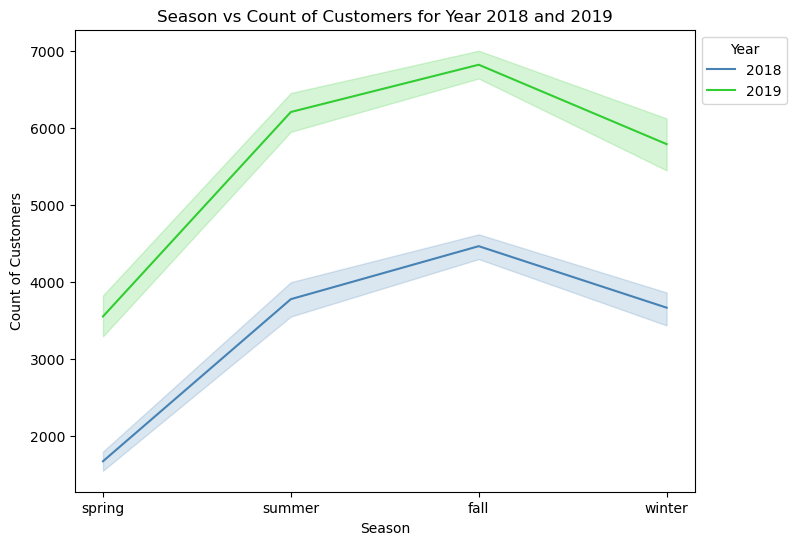

In [69]:
plt.figure(figsize=(8, 6))
custom_palette = sns.color_palette(["#4682B4", "#32CD32"])
sns.lineplot(data=df, x='season', y='cnt', hue='yr', palette=custom_palette)
plt.xlabel('Season')
plt.ylabel('Count of Customers')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Season vs Count of Customers for Year 2018 and 2019')
plt.show()

<font color = red><b>Observation - </b></font>For both years demand was low during 'Spring' season

## Pair plot

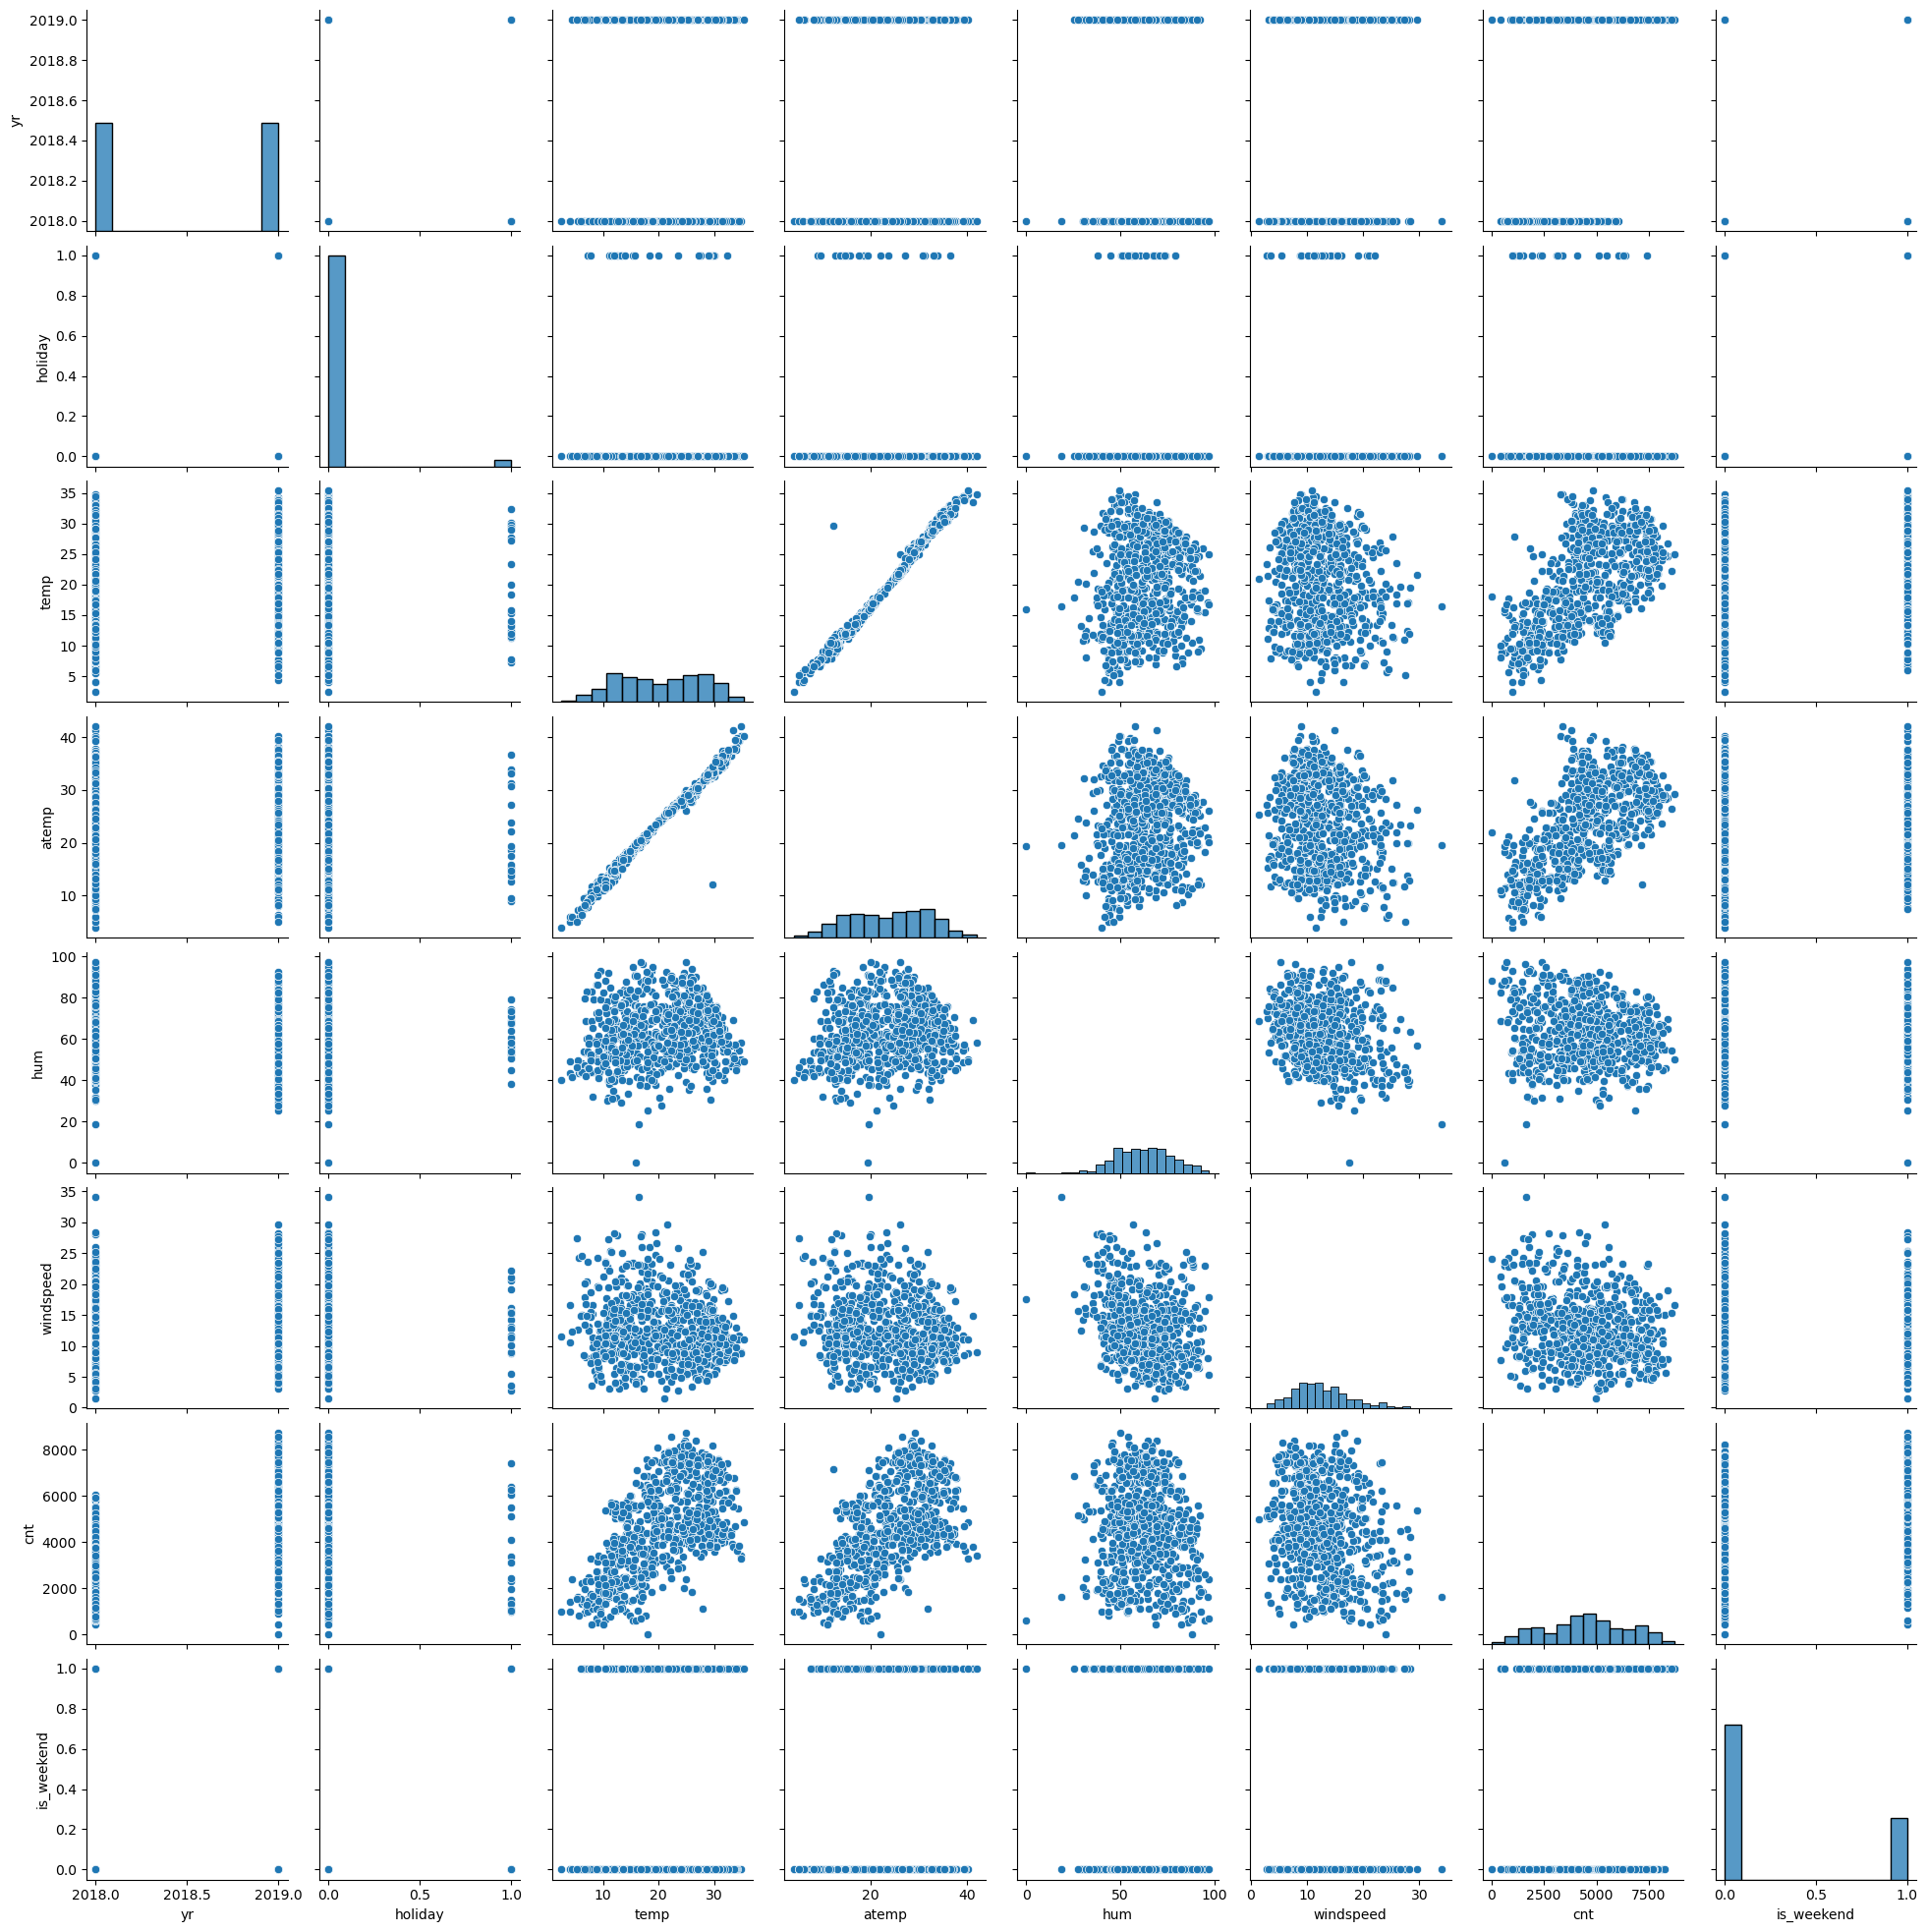

In [72]:
# Visualising the Numerical Variables
sns.pairplot(df)
plt.show()

### Heatmap

In [74]:
corr_num = df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()
corr_num

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


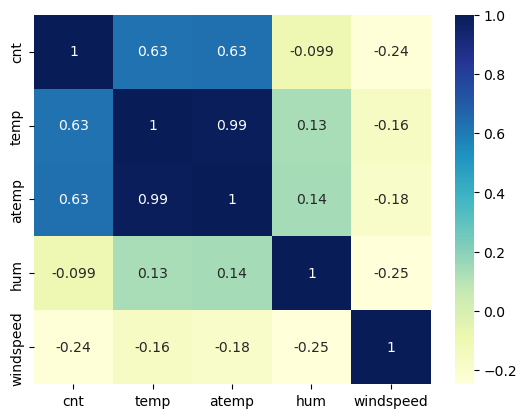

In [75]:
sns.heatmap(corr_num, annot=True, cmap='YlGnBu')
plt.show()

<font color = red><b>Observation - </b></font>Temperature and Actual Temperature are Highly Positively corelated with each other. So we can drop one of them.

In [77]:
# Dropping Actual Temperature
df.drop(labels=['atemp'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,is_weekend
0,spring,2018,January,0,Monday,Mist Cloudy,14.110847,80.5833,10.749882,985,0
1,spring,2018,January,0,Tuesday,Mist Cloudy,14.902598,69.6087,16.652113,801,0
2,spring,2018,January,0,Wednesday,Clear,8.050924,43.7273,16.636703,1349,0
3,spring,2018,January,0,Thursday,Clear,8.200000,59.0435,10.739832,1562,0
4,spring,2018,January,0,Friday,Clear,9.305237,43.6957,12.522300,1600,0


## Preparing the Data for Modelling
- Encoding:
    - Converting Binary Categorical variables (Yes/No) into 1/0
    - Other Categorical variables to Dummy variables
 
- Splitting into train and test
- Rescaling of variables

In [79]:
# Binary variables
varlist = ['yr']

In [80]:
df[varlist] = df[varlist].apply(lambda x : x.map({2018 : 0, 2019 : 1}))
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,is_weekend
0,spring,0,January,0,Monday,Mist Cloudy,14.110847,80.5833,10.749882,985,0
1,spring,0,January,0,Tuesday,Mist Cloudy,14.902598,69.6087,16.652113,801,0
2,spring,0,January,0,Wednesday,Clear,8.050924,43.7273,16.636703,1349,0
3,spring,0,January,0,Thursday,Clear,8.200000,59.0435,10.739832,1562,0
4,spring,0,January,0,Friday,Clear,9.305237,43.6957,12.522300,1600,0


### Dummy Variables

#### Creating Dummy Variables for Season

In [83]:
season = pd.get_dummies(df['season'], drop_first=True, dtype='int')
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [84]:
# Concat dummy dataframe with Original one
df = pd.concat([df, season], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,is_weekend,spring,summer,winter
0,spring,0,January,0,Monday,Mist Cloudy,14.110847,80.5833,10.749882,985,0,1,0,0
1,spring,0,January,0,Tuesday,Mist Cloudy,14.902598,69.6087,16.652113,801,0,1,0,0
2,spring,0,January,0,Wednesday,Clear,8.050924,43.7273,16.636703,1349,0,1,0,0
3,spring,0,January,0,Thursday,Clear,8.200000,59.0435,10.739832,1562,0,1,0,0
4,spring,0,January,0,Friday,Clear,9.305237,43.6957,12.522300,1600,0,1,0,0


In [85]:
# Droping Season column
df.drop(labels='season', axis=1, inplace=True)
df.head()

,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,is_weekend,spring,summer,winter
0,0,January,0,Monday,Mist Cloudy,14.110847,80.5833,10.749882,985,0,1,0,0
1,0,January,0,Tuesday,Mist Cloudy,14.902598,69.6087,16.652113,801,0,1,0,0
2,0,January,0,Wednesday,Clear,8.050924,43.7273,16.636703,1349,0,1,0,0
3,0,January,0,Thursday,Clear,8.200000,59.0435,10.739832,1562,0,1,0,0
4,0,January,0,Friday,Clear,9.305237,43.6957,12.522300,1600,0,1,0,0


#### Creating Dummy Variables for Month

In [87]:
month = pd.get_dummies(df['mnth'], drop_first=True, dtype='int')
month.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [88]:
# Concat dummy dataframe with Original one
df = pd.concat([df, month], axis=1)
df.head()

,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,is_weekend,...,December,February,January,July,June,March,May,November,October,September
0,0,January,0,Monday,Mist Cloudy,14.110847,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,0
1,0,January,0,Tuesday,Mist Cloudy,14.902598,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,January,0,Wednesday,Clear,8.050924,43.7273,16.636703,1349,0,...,0,0,1,0,0,0,0,0,0,0
3,0,January,0,Thursday,Clear,8.200000,59.0435,10.739832,1562,0,...,0,0,1,0,0,0,0,0,0,0
4,0,January,0,Friday,Clear,9.305237,43.6957,12.522300,1600,0,...,0,0,1,0,0,0,0,0,0,0


In [89]:
# Droping Month column
df.drop(labels='mnth', axis=1, inplace=True)
df.head()

,yr,holiday,weekday,weathersit,temp,hum,windspeed,cnt,is_weekend,spring,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Monday,Mist Cloudy,14.110847,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tuesday,Mist Cloudy,14.902598,69.6087,16.652113,801,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wednesday,Clear,8.050924,43.7273,16.636703,1349,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thursday,Clear,8.200000,59.0435,10.739832,1562,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Friday,Clear,9.305237,43.6957,12.522300,1600,0,1,...,0,0,1,0,0,0,0,0,0,0


### Creating Dummy variable for Weekday

In [91]:
weekday = pd.get_dummies(df['weekday'], drop_first=True, dtype='int')
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [92]:
# Concat dummy dataframe with Original one
df = pd.concat([df, weekday], axis=1)
df.head()

,yr,holiday,weekday,weathersit,temp,hum,windspeed,cnt,is_weekend,spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Monday,Mist Cloudy,14.110847,80.5833,10.749882,985,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,Tuesday,Mist Cloudy,14.902598,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Wednesday,Clear,8.050924,43.7273,16.636703,1349,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Thursday,Clear,8.200000,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Friday,Clear,9.305237,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Droping Weekday column
df.drop(labels='weekday', axis=1, inplace=True)
df.head()

,yr,holiday,weathersit,temp,hum,windspeed,cnt,is_weekend,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Mist Cloudy,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,Mist Cloudy,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Clear,8.050924,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Clear,8.200000,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Clear,9.305237,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Creating Dummy variable for weathersit column

In [95]:
weathersit = pd.get_dummies(df['weathersit'], drop_first=True, dtype='int')
weathersit.head()

,Light Rain,Mist Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [96]:
# Concat dummy dataframe with Original one
df = pd.concat([df, weathersit], axis=1)
df.head()

,yr,holiday,weathersit,temp,hum,windspeed,cnt,is_weekend,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy
0,0,0,Mist Cloudy,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,Mist Cloudy,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,Clear,8.050924,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,Clear,8.200000,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,Clear,9.305237,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Droping weathersit column
df.drop(labels='weathersit', axis=1, inplace=True)
df.head()

,yr,holiday,temp,hum,windspeed,cnt,is_weekend,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy
0,0,0,14.110847,80.5833,10.749882,985,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,8.050924,43.7273,16.636703,1349,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,8.200000,59.0435,10.739832,1562,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,9.305237,43.6957,12.522300,1600,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting into train and test

In [99]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [100]:
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,is_weekend,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy
576,1,0,29.246653,70.4167,11.083475,7216,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,16.980847,62.1250,10.792293,4066,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,10.489153,48.3333,23.500518,1796,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,15.443347,48.9583,8.708325,4220,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,13.803347,72.9583,14.707907,1683,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


## Rescaling the Features

In [102]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# Create list of numeric vars
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [103]:
# 2. Fit and Transform on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,is_weekend,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy
576,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0.191095,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [104]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


## Training the model

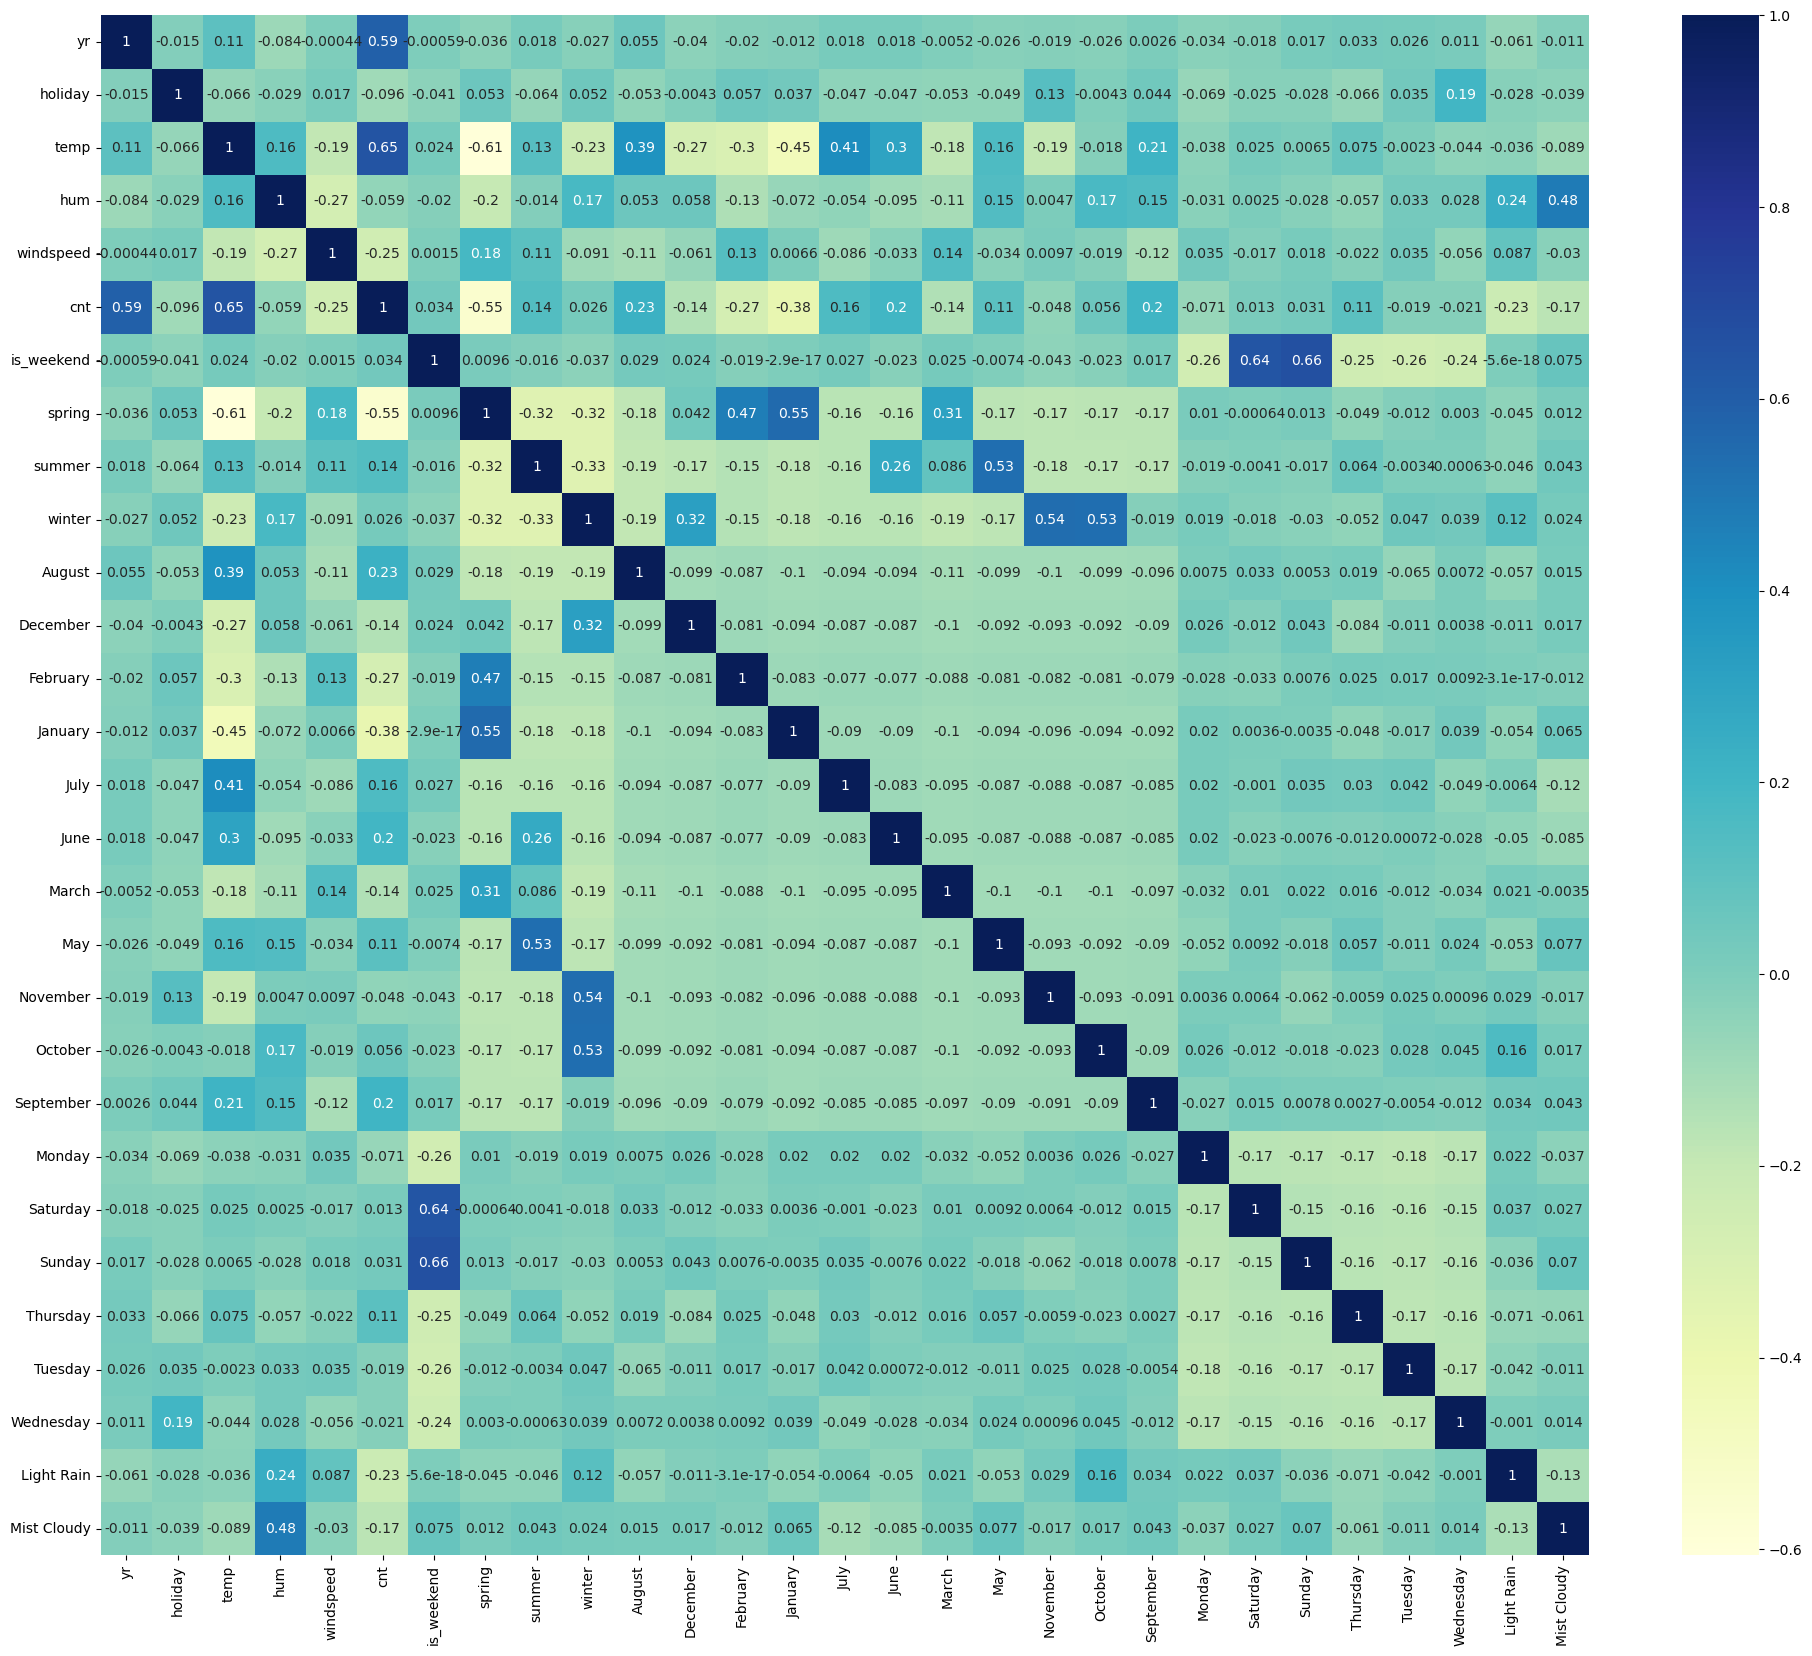

In [106]:
# Checking correlation using Heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [107]:
y_train = df_train.pop('cnt')
X_train = df_train

In [108]:
X_train.head()

,yr,holiday,temp,hum,windspeed,is_weekend,spring,summer,winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [109]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## Building Model

## RFE
Recursive feature elimination

In [112]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [113]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [114]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('is_weekend', False, 12),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 6),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 9),
 ('March', False, 14),
 ('May', False, 5),
 ('November', True, 1),
 ('October', False, 10),
 ('September', True, 1),
 ('Monday', False, 4),
 ('Saturday', False, 13),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 3),
 ('Wednesday', False, 7),
 ('Light Rain', True, 1),
 ('Mist Cloudy', True, 1)]

In [115]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'Light Rain', 'Mist Cloudy'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [117]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [118]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_rfe)

# Creating model
lr_model_1 = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.15e-189
Time:                        22:18:40   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3197      0.036      8.859      0.000       0.249       0.391
yr              0.2304      0.008     28.487      0.000       0.215       0.246
holiday        -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp            0.4815      0.037     13.005      0.000       0.409       0.554
hum            -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed      -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring         -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer          0.0423      0.015      2.761      0.006       0.012       0.072
winter          0.1019      0.018      5.656      0.000       0.067       0.137
December       -0.0355      0.018     -2.024      0.043      -0.070      -0.001
January        -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
November       -0.0387      0.019     -2.057      0.040      -0.076      -0.002
September       0.0755      0.017      4.466      0.000       0.042       0.109
Light Rain     -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.52
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.77
4,hum,1.92
12,November,1.77
10,January,1.68
15,Mist Cloudy,1.57
9,December,1.50


In [120]:
X_train_new.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,December,January,July,November,September,Light Rain,Mist Cloudy
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


#### Removing `spring` since it has High VIF

In [122]:
X_train_new.drop(labels='spring', axis=1, inplace=True)

# Training new model
lr_model_2 = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.50e-188
Time:                        22:18:40   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2562      0.029      8.899      0.000       0.200       0.313
yr              0.2290      0.008     28.159      0.000       0.213       0.245
holiday        -0.0946      0.026     -3.670      0.000      -0.145      -0.044
temp            0.5550      0.027     20.527      0.000       0.502       0.608
hum            -0.1742      0.038     -4.601      0.000      -0.249      -0.100
windspeed      -0.1971      0.026     -7.634      0.000      -0.248      -0.146
summer          0.0729      0.011      6.548      0.000       0.051       0.095
winter          0.1369      0.013     10.204      0.000       0.111       0.163
December       -0.0295      0.018     -1.683      0.093      -0.064       0.005
January        -0.0472      0.018     -2.590      0.010      -0.083      -0.011
July           -0.0452      0.018     -2.509      0.012      -0.081      -0.010
November       -0.0288      0.019     -1.548      0.122      -0.065       0.008
September       0.0903      0.016      5.571      0.000       0.058       0.122
Light Rain     -0.2402      0.027     -9.058      0.000      -0.292      -0.188
Mist Cloudy    -0.0514      0.010     -4.906      0.000      -0.072      -0.031
==============================================================================
Omnibus:                       58.341   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.396
Skew:                          -0.649   Prob(JB):                     4.36e-27
Kurtosis:                       5.007   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.76
3,temp,2.32
7,winter,2.09
4,hum,1.90
11,November,1.71
9,January,1.67
14,Mist Cloudy,1.55
8,December,1.48
6,summer,1.44
10,July,1.43


#### Removing `November` since it has High p-value

In [125]:
X_train_new.drop(labels='November', axis=1, inplace=True)

# Creating new model
lr_model_3 = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.91e-189
Time:                        22:18:40   Log-Likelihood:                 508.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     496   BIC:                            -930.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2502      0.029      8.758      0.000       0.194       0.306
yr              0.2290      0.008     28.118      0.000       0.213       0.245
holiday        -0.0991      0.026     -3.863      0.000      -0.149      -0.049
temp            0.5624      0.027     21.111      0.000       0.510       0.615
hum            -0.1736      0.038     -4.580      0.000      -0.248      -0.099
windspeed      -0.1971      0.026     -7.621      0.000      -0.248      -0.146
summer          0.0740      0.011      6.651      0.000       0.052       0.096
winter          0.1263      0.012     10.926      0.000       0.104       0.149
December       -0.0191      0.016     -1.177      0.240      -0.051       0.013
January        -0.0431      0.018     -2.388      0.017      -0.079      -0.008
July           -0.0461      0.018     -2.556      0.011      -0.082      -0.011
September       0.0930      0.016      5.760      0.000       0.061       0.125
Light Rain     -0.2377      0.027     -8.968      0.000      -0.290      -0.186
Mist Cloudy    -0.0511      0.010     -4.865      0.000      -0.072      -0.030
==============================================================================
Omnibus:                       55.188   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.061
Skew:                          -0.625   Prob(JB):                     4.64e-25
Kurtosis:                       4.926   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.81
3,temp,2.25
4,hum,1.90
9,January,1.63
7,winter,1.55
13,Mist Cloudy,1.55
6,summer,1.44
10,July,1.43
8,December,1.26
12,Light Rain,1.25


#### Removing `December` since it has High p-value

In [128]:
X_train_new.drop(labels='December', axis=1, inplace=True)

# Creating new model
lr_model_4 = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.04e-189
Time:                        22:18:40   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2449      0.028      8.677      0.000       0.189       0.300
yr              0.2289      0.008     28.098      0.000       0.213       0.245
holiday        -0.0980      0.026     -3.824      0.000      -0.148      -0.048
temp            0.5715      0.026     22.407      0.000       0.521       0.622
hum            -0.1779      0.038     -4.714      0.000      -0.252      -0.104
windspeed      -0.1948      0.026     -7.551      0.000      -0.245      -0.144
summer          0.0756      0.011      6.843      0.000       0.054       0.097
winter          0.1248      0.011     10.859      0.000       0.102       0.147
January        -0.0382      0.018     -2.174      0.030      -0.073      -0.004
July           -0.0468      0.018     -2.594      0.010      -0.082      -0.011
September       0.0944      0.016      5.858      0.000       0.063       0.126
Light Rain     -0.2349      0.026     -8.895      0.000      -0.287      -0.183
Mist Cloudy    -0.0504      0.010     -4.804      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       53.439   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.260
Skew:                          -0.611   Prob(JB):                     5.11e-24
Kurtosis:                       4.885   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.59
3,temp,2.06
4,hum,1.88
8,January,1.55
12,Mist Cloudy,1.55
7,winter,1.53
9,July,1.43
6,summer,1.41
11,Light Rain,1.24
5,windspeed,1.19


In [130]:
lr_model_4.params

const          0.244945
yr             0.228921
holiday       -0.098037
temp           0.571530
hum           -0.177897
windspeed     -0.194777
summer         0.075636
winter         0.124753
January       -0.038226
July          -0.046810
September      0.094356
Light Rain    -0.234939
Mist Cloudy   -0.050354
dtype: float64

## Residual Analysis

In [132]:
y_train_pred = lr_model_4.predict(X_train_new)
y_train_pred.head()

576    0.712307
426    0.512730
728    0.396186
482    0.598822
111    0.259922
dtype: float64

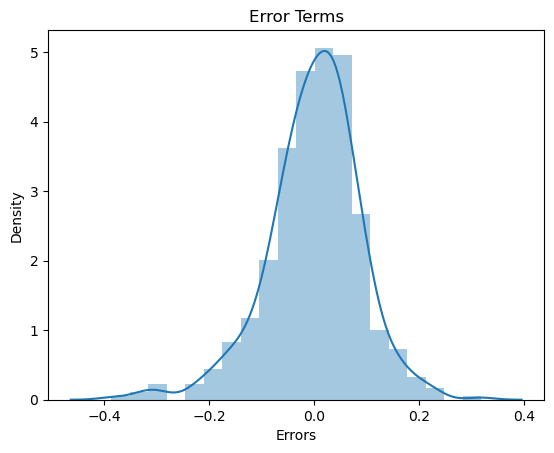

In [133]:
# Plot the distribution plot of the error terms
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

<font color = red><b>Observation - </b></font>Graph looks like normal distribution with mean of graph around 0

In [135]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'January', 'July', 'September', 'Light Rain', 'Mist Cloudy'],
      dtype='object')

## Making Predictions

### Applying the scaling on the test sets

In [138]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [140]:
y_test = df_test.pop('cnt')
X_test = df_test

In [141]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'January', 'July', 'September', 'Light Rain', 'Mist Cloudy']]

In [142]:
# Adding Constant
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_test_pred = lr_model_4.predict(X_test_new)

## Model Evaluation

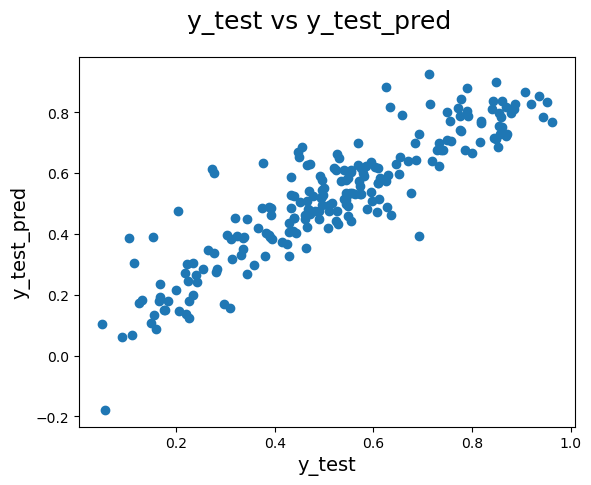

In [144]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=18)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                               # X-label
plt.ylabel('y_test_pred', fontsize=14)                          # Y-label
plt.show()

In [145]:
# Evaluate the model
print('R2 Score of Train = ', r2_score(y_true=y_train, y_pred=y_train_pred))
print('R2 Score of Test = ',r2_score(y_true=y_test, y_pred=y_test_pred))

R2 Score of Train =  0.8411162369897525
R2 Score of Test =  0.8034772805912217
